In [1]:
import os

#返回向量和他的标签
def img2vector(file_name):
    return_vector=[]
    return_lable = int(os.path.splitext(file_name)[0].split('\\')[-1].split('_')[0])
    
    with open(file_name,'r') as rf:
        for line in rf:
            return_vector+= [int(a) for a in list(line.strip())]
            
    return return_vector,return_lable

#构建数据集：data_X,data_y
def make_dataset(folder_name):
    data_X=[]
    data_y=[]
    
    for root,dirs,files in os.walk(folder_name):
        for file in files:
            file_name =os.path.join(root, file)
            img_vector=img2vector(file_name)
            data_X.append(img_vector[0])
            data_y.append(img_vector[1])
            
    return data_X,data_y

In [2]:
os.getcwd()

'D:\\Jupyter\\Machine-Learning-master\\kNN\\3.数字识别'

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [4]:
folder_name=r"D:\Jupyter\Machine-Learning-master\kNN\3.数字识别\trainingDigits"

data_X, data_y = make_dataset(folder_name)

x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)

# 4.送入算法
model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=3,weights='distance')
model.fit(x_train, y_train) # 将测试集送入算法

print("准确率：",model.score(x_test, y_test))

准确率： 0.9870801033591732


In [ ]:
from sklearn.externals import joblib

#保存模型
joblib.dump(model,'knn_digital_recognition.model')

['knn_digital_recognition.model']

In [ ]:
#加载和使用模型
RF=joblib.load('knn_digital_recognition.model')
file_name=r"D:\Jupyter\Machine-Learning-master\kNN\3.数字识别\testDigits\7_1.txt"
# print(img2vector(file_name)[0])
a=[]
count=0
for b in img2vector(file_name)[0]:
    a.append(b)
    count+=1
    if count%32==0:
        print(np.array(a))
        a.clear()
# print(img2vector(file_name)[1])
# thsDoc=[img2vector(file_name)[0],[img2vector(file_name)[1]]]
result=RF.predict([img2vector(file_name)[0]])
# print(x_test)
# print(RF.score(x_test, y_test))
# print(y_test)
print(result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0

In [ ]:
#使用交叉验证来寻找最优的n_neighbors参数，并展示出来
from sklearn.model_selection import cross_val_score
k_range=range(1,31)
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,data_X,data_y,cv=10,scoring='accuracy')
    print('---------------------------',k,scores.mean())
    k_score.append(scores.mean())

--------------------------- 1 0.9576381300988528
--------------------------- 2 0.9513899897636966
--------------------------- 3 0.9577094581375741
--------------------------- 4 0.9571452359461252
--------------------------- 5 0.9596797497007211
--------------------------- 6 0.9545270934364393
--------------------------- 7 0.9576151503084024
--------------------------- 8 0.9519170834276748
--------------------------- 9 0.9540035080016377
--------------------------- 10 0.9498550907848623
--------------------------- 11 0.9514202641777925
--------------------------- 12 0.9524086171793107
--------------------------- 13 0.9529561336631536
--------------------------- 14 0.9498442941265166
--------------------------- 15 0.9503678260781573
--------------------------- 16 0.9483162147883111
--------------------------- 17 0.9483189703683607
--------------------------- 18 0.9446833771429872
--------------------------- 19 0.9457173918750985
--------------------------- 20 0.9462434572235179
---------

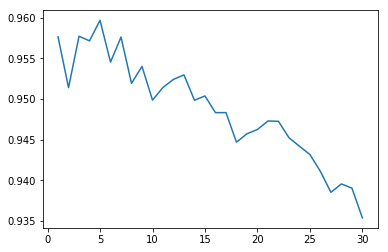

In [ ]:
#画图之前先执行此命令
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(k_range,k_score)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
# 2.将数据分割成训练集和测试集 test_size=0.25表示将25%的数据用作测试集
x_train, x_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25)
# 3.特征工程(对特征值进行标准化处理)
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)


################探索超参数################
# array<dict<参数名：参数可能的取值>>
param_grid =[
                {
                    'weights':['uniform'],
                    'n_neighbors': [i for i in range(1,11)]
                },
                {
                    'weights':['distance'],
                    'n_neighbors': [i for i in range(1,11)],
                    'p': [i for i in range(1,6)]
                }
            ]

# 先new一个默认的Classifier对象
knn_clf = KNeighborsClassifier()
#最佳参数为：knn_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=3,weights='distance')
#最佳得分为：0.9910714285714286

# 调用GridSearchCV创建网格搜索对象，传入参数为Classifier对象以及参数列表
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf,param_grid,cv=10)

# 调用fit方法执行网格搜索
#         %%time
grid_search.fit(x_train,y_train)

# 获得最好的评估结果，返回的是KNeighborsClassifier对象，可以直接拿来做机器学习预测了
print('--------grid_search.best_estimator_--------',grid_search.best_estimator_)

# 最好的分数
print('--------grid_search.best_score_--------',grid_search.best_score_)

# 最好的参数
print('--------grid_search.best_params_--------',grid_search.best_params_)

In [ ]:
knn = Classification()
knn.run()